In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

In [3]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)


In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


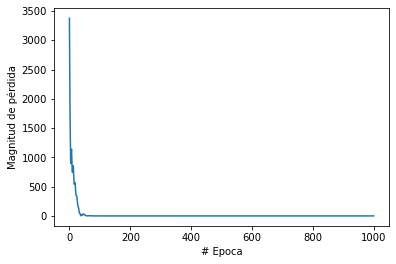

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [9]:
print("Hagamos una predicción!")
resultado = modelo.predict([28.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[82.399994]] fahrenheit!


In [8]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.8883385 ,  0.40923995,  0.00885685]], dtype=float32), array([-3.6921337, -2.4102535, -3.3858213], dtype=float32)]
[array([[-0.9186833 ,  1.4034095 , -0.7873318 ],
       [ 0.02815322,  0.7231121 , -0.5173362 ],
       [ 0.12618579,  1.215647  ,  0.48846745]], dtype=float32), array([-1.1942426, -3.689807 ,  2.0302958], dtype=float32)]
[array([[-0.10518797],
       [-1.8654466 ],
       [ 0.271602  ]], dtype=float32), array([3.4701986], dtype=float32)]
